# CIFAR-10 Dataset 시각화

## data overview

100%|██████████| 170M/170M [00:05<00:00, 30.4MB/s]


Extracting CIFAR10/cifar-10-python.tar.gz to CIFAR10
Files already downloaded and verified
train_data.shape = (50000, 32, 32, 3), type(train_data) = <class 'numpy.ndarray'>
len(train_target) = 50000, type(train_target) = <class 'list'>, type(train_target[0]) = <class 'int'>
test_data.shape = (10000, 32, 32, 3)
len(test_target) = 10000, type(test_target) = <class 'list'>
train_target[:10] = [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
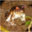

In [ ]:
import torch
from torchvision import datasets
import numpy as np

train_dataset = datasets.CIFAR10(root='CIFAR10',
                                 train=True,
                                 download=True)
test_dataset = datasets.CIFAR10(root='CIFAR10',
                                train=False,
                                download=True)

train_data = train_dataset.data       # numpy.ndarray (50000, 32, 32, 3)
train_target = train_dataset.targets  # <class 'list'> 50000
test_data = test_dataset.data         # numpy.ndarray (10000, 32, 32, 3)
test_target = test_dataset.targets    # <class 'list'> 10000

print(f'train_data.shape = {train_data.shape}, type(train_data) = {type(train_data)}')
print(f'len(train_target) = {len(train_target)}, type(train_target) = {type(train_target)}, type(train_target[0]) = {type(train_target[0])}')
print(f'test_data.shape = {test_data.shape}')
print(f'len(test_target) = {len(test_target)}, type(test_target) = {type(test_target)}')

print(f'train_target[:10] = {train_target[:10]}')
train_data[0]

## image 시각화

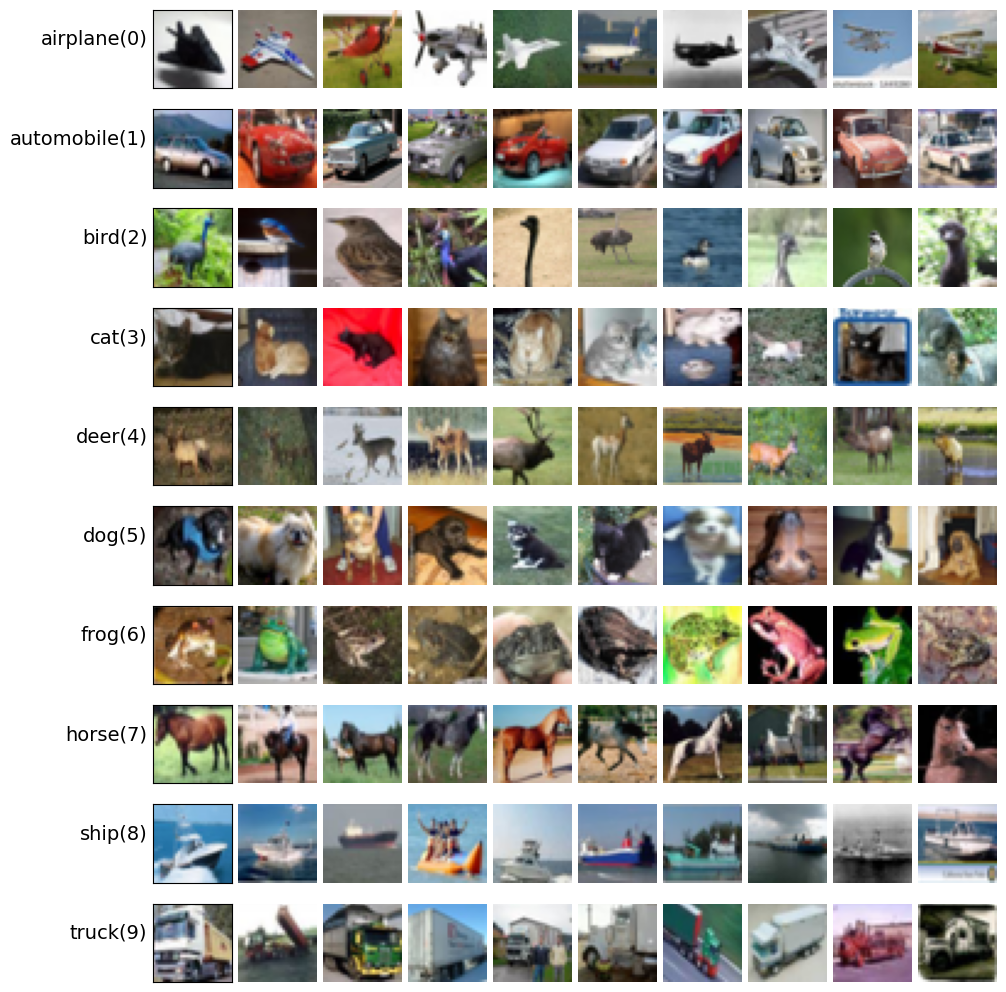

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

row_num, col_num = len(train_dataset.classes), 10
fig, ax = plt.subplots(row_num, col_num, figsize=(10, 10))

for label_class, plot_row in enumerate(ax):
    ## array of index per each target classes
    label_idx = np.where(np.array(train_target) == label_class)[0]
    for i, plot_cell in enumerate(plot_row):
        if i == 0:
            ## adding class label at ylabel axis
            plot_cell.set_ylabel(f'{train_dataset.classes[label_class]}({label_class})',
                                 fontsize=14, rotation=0, ha='right')
            ## no ticks at x, y axis
            plot_cell.set_yticks([])
            plot_cell.set_xticks([])
            idx = label_idx[i]
            img = train_data[idx]
            plot_cell.imshow(img)
        else:
            # turn off axis
            plot_cell.axis('off')
            # pick the first 10 images from each classes
            idx = label_idx[i]
            img = train_data[idx]
            plot_cell.imshow(img)

# Adjust the padding between and around subplots
plt.tight_layout(pad=0.5)

# data 준비

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import torch.utils as utils
import torch.nn as nn
import torch.optim as optim

BATCH_SIZE = 64  # batch size 정의

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"using PyTorch version: {torch.__version__}, device: {device}")

train_dataset = datasets.CIFAR10(root='CIFAR10',   # download 경로
                                 train=True,       # training data 반환
                                 # [0, 255] 범위 내의 PIL Image나 NumPy ndarray를 torch.FloatTensor로 로 변환
                                 # (HxWxC) ⇒ (CxHxW)로 변경
                                 # image pixel 값을 [0.0, 1.0] 범위로 비례하여 조정(scale)
                                 transform=transforms.ToTensor(),
                                 # 해당 경로(root)에 MNIST data가 없다면 다운로드
                                 download=True)
test_dataset = datasets.CIFAR10(root='CIFAR10',
                                train=False,       # test data 반환
                                transform=transforms.ToTensor(),
                                download=True)
print(f'type(train_dataset) = {type(train_dataset)}, len(train_dataset) = {len(train_dataset)}')
print(f'type(test_dataset) = {type(test_dataset)}, len(test_dataset) = {len(test_dataset)}')
print(f'train_dataset.data.shape = {train_dataset.data.shape}, type(train_dataset.data[0]) = {type(train_dataset.data[0])}')
print(f'len(train_dataset.targets) = {len(train_dataset.targets)}, type(train_dataset.targets[0]) = {type(train_dataset.targets[0])}')

tot_train_size = len(train_dataset)
train_dataset_size = int(tot_train_size * 0.85)               # 85% 를 train data로 분리
validation_dataset_size = tot_train_size - train_dataset_size # 나머지 15% 를 validation data로 분리

# train dataset의 분리
train_dataset, validation_dataset = utils.data.random_split(
                                            train_dataset,
                                            [train_dataset_size, validation_dataset_size])
# len(train_dataset): 50,0000 * 0.85 = 42,500
# len(validation_dataset): 50,0000 * 0.15 = 7,500
# len(test_dataset) = 10000
print(f'tot_train_size = {tot_train_size}, len(train_dataset) = {len(train_dataset)}, len(validation_dataset) = {len(validation_dataset)}')
print(f'len(test_dataset) = {len(test_dataset)}')

train_dataset_loader = DataLoader(dataset=train_dataset,
                                  batch_size=BATCH_SIZE,
                                  shuffle=True)
validation_dataset_loader = DataLoader(dataset=validation_dataset,
                                       batch_size=BATCH_SIZE,
                                       shuffle=True)
test_dataset_loader = DataLoader(dataset=test_dataset,
                                 batch_size=BATCH_SIZE,
                                 shuffle=True)
# len(train_dataset): 50,0000 * 0.85 = 42,500
#    len(train_dataset_loader): 42,500 / 64 = 665
#
# len(validation_dataset): 50,0000 * 0.15 = 7,500
#    len(validation_dataset_loader): 7,500 / 64 = 118
#
# len(test_dataset) = 10,000
#    len(test_dataset_loader): 10,000 / 64 = 157
print(f'len(train_dataset_loader): {len(train_dataset_loader)}')
print(f'len(validation_dataset_loader): {len(validation_dataset_loader)}')
print(f'len(test_dataset_loader): {len(test_dataset_loader)}')

device = cuda
Files already downloaded and verified
Files already downloaded and verified
type(train_dataset) = <class 'torchvision.datasets.cifar.CIFAR10'>, len(train_dataset) = 50000
type(test_dataset) = <class 'torchvision.datasets.cifar.CIFAR10'>, len(test_dataset) = 10000
train_dataset.data.shape = (50000, 32, 32, 3), type(train_dataset.data[0]) = <class 'numpy.ndarray'>
len(train_dataset.targets) = 50000, type(train_dataset.targets[0]) = <class 'int'>
tot_train_size = 50000, len(train_dataset) = 42500, len(validation_dataset) = 7500
len(test_dataset) = 10000
len(train_dataset_loader): 665
len(validation_dataset_loader): 118
len(test_dataset_loader): 157


# model 정의

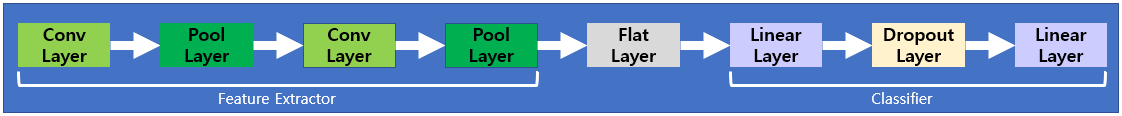

In [ ]:
class CNN(nn.Module):

  def __init__(self):

    super().__init__()

    self.conv1 = nn.Conv2d(in_channels=3,
                           out_channels=32,
                           kernel_size=3, # kernel의 수도 32
                           padding=1)     # data의 크기에 변화가 없다

    self.conv2 = nn.Conv2d(in_channels=32,
                           out_channels=64,
                           kernel_size=3, # kernel의 수도 64
                           padding=1)

    # channel의 수는 불변이나 data 크기는 절반으로
    self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)

    self.fc1 = nn.Linear(8*8*64, 128)
    self.fc2 = nn.Linear(128, 10)

    self.dropout25 = nn.Dropout(p=0.25)
    self.dropout50 = nn.Dropout(p=0.5)

  def forward(self, data):       # (?, 3, 32, 32), color image이므로 channel은 3

    data = self.conv1(data)      # (?, 32, 32, 32), padding을 했기 때문에, size는 불변, channel 수만 변화
    data = torch.relu(data)      # (?, 32, 32, 32)
    data = self.pooling(data)    # (?, 32, 16, 16), channel은 그대로, size만 절반으로
    data = self.dropout25(data)  # (?, 32, 16, 16)

    data = self.conv2(data)      # (?, 64, 16, 16), padding을 했기 때문에, size는 불변, channel 수만 변화
    data = torch.relu(data)      # (?, 64, 16, 16)
    data = self.pooling(data)    # (?, 64, 8, 8), channel은 그대로, size만 절반으로
    data = self.dropout25(data)  # (?, 64, 8, 8)

    data = data.view(-1, 64*8*8) # (?, 4096) = 64 * 8 * 8

    data = self.fc1(data)        # (?, 128)
    data = torch.relu(data)      # (?, 128)
    data = self.dropout50(data)  # (?, 128)

    data = self.fc2(data)        # (?, 10)

    return data

model = CNN().to(device)
print(model)

# CrossEntropyLoss() 에는 Softmax가 포함되어 있다.
# model의 출력값에 Softmax 함수를 적용한 후에 손실함수를 계산한다.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# parameter 확인
for name, child in model.named_children():
  for param in child.parameters():
    print(f'{name}: {param.size()}')

# test code
#inputs = torch.Tensor(1, 3, 32, 32)
#model(inputs)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout25): Dropout(p=0.25, inplace=False)
  (dropout50): Dropout(p=0.5, inplace=False)
)
conv1: torch.Size([32, 3, 3, 3])
conv1: torch.Size([32])
conv2: torch.Size([64, 32, 3, 3])
conv2: torch.Size([64])
fc1: torch.Size([128, 4096])
fc1: torch.Size([128])
fc2: torch.Size([10, 128])
fc2: torch.Size([10])


# model 학습 함수 정의

In [ ]:
def model_train(dataloader, model, cretirion, optimizer):

  # model을 학습 mode로 ...
  # model parameters((Weight, Bias)를 update하는 mode
  model.train()

  train_loss_sum = train_correct = train_total = 0
  train_total_batch = 0

  '''
  ### Debug ####################################
  index = 0
  ### Debug ####################################
  '''

  # images: 입력 image, labels: 0~9 정답 숫자
  for images, labels in dataloader:

    x_train = images.to(device)
    y_train = labels.to(device)

    outputs = model(x_train) # model에 대한 예측값 계산
    loss = criterion(outputs, y_train) # 손실함수 계산

    # 역전파(backpropagation)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_sum += loss.item()

    '''
    ### Debug ####################################
    if index > 0:
      break
    index += 1

    # 64: batch size
    print(f'images.shape = {images.shape}')    # images.shape = torch.Size([64, 3, 32, 32])
    print(f'labels.shape = {labels.shape}')    # labels.shape = torch.Size([64])
    print(f'x_train.shape = {x_train.shape}')  # x_train.shape = torch.Size([64, 1, 32, 32])
    print(f'y_train.shape = {y_train.shape}')  # y_train.shape = torch.Size([64])
    print(f'y_train.type() = {y_train.type()}')  # y_train.type() = torch.LongTensor
    print(f'y_train.size() = {y_train.size()}')  # y_train.type() = torch.LongTensor
    print(f'y_train.size(0) = {y_train.size(0)}')  # y_train.type() = torch.LongTensor
    print(f'outputs.shape = {outputs.shape}')  # outputs.shape = torch.Size([64, 10])
    print(f'y_train = {y_train}')              # y_train = tensor([4, 9, 5, 8, 1, 4, 4, 8, 4, 7, 5, 5, 4, 5, 7, 7, 5, 6, 3, 1, 9, 0, 7, 2, 6, 9, 9, 2, 8, 2, 7, 5, 0, 5, 4, 5, 5, 3, 2, 4, 0, 3, 4, 4, 8, 1, 3, 2, 4, 4, 2, 6, 4, 8, 5, 0, 8, 8, 9, 1, 1, 9, 6, 9])
    print(f'outputs[0] = {outputs[0]}')        # outputs[0] = tensor([ 0.1357,  0.1019, -0.2117,  0.3458, -0.0066, -0.0614,  0.0471,  0.1862, 0.0192,  0.0437], grad_fn=<SelectBackward0>)
    print(f'torch.argmax(outputs, 1) = {torch.argmax(outputs, 1)}') # 0.3458 의 index 3 return
                                               # torch.argmax(outputs, 1) = tensor([3, 0, 0, 4, 1, 4, 7, 1, 8, 1, 1, 4, 7, 4, 4, 4, 4, 4, 8, 4, 1, 1, 1, 4, 4, 3, 7, 4, 4, 4, 4, 4, 1, 7, 4, 4, 7, 3, 1, 1, 4, 7, 4, 4, 4, 7, 8, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 3, 8, 4, 4, 4])
    print(f'outputs = {outputs}')
    ### Debug ####################################
    '''

    train_total += y_train.size(0) # 64, size(): shape과 동일
    # argmax(tensor, dim=1): dim(열)을 기준(각 행에서)으로 안에 있는 최대값의 위치를 각각 반환
    # item(): tensor에 저장된 값만을 반환
    train_correct += (torch.argmax(outputs, 1) == y_train).sum().item()

  # 학습 data의 평균 오차 계산
  train_avg_loss = train_loss_sum / len(dataloader)
  # 학습 data의 평균 정확도 계산
  train_avg_accuracy = 100 * train_correct / train_total

  return (train_avg_loss, train_avg_accuracy)

'''
### Debug ####################################
model_train(train_dataset_loader, model, criterion, optimizer)
### Debug ####################################
'''

'\n### Debug ####################################\nmodel_train(train_dataset_loader, model, criterion, optimizer)\n### Debug ####################################\n'

# model 검증 함수 정의

In [ ]:
def model_evaluate(dataloader, model, loss_function, optimizer):

  # model을 평가(추론) mode로 ..
  # model의 parameter를 update 하지 않는 mode
  model.eval()

  # gradient를 계산하는 autograd engine을 비활성화한다.
  # 역전파(Backpropagation)에 필요한 메모리 등을 절약할 수 있어 계산 시 연산 속도가 빨라진다
  with torch.no_grad():
    # 검증 함수에는 역전파(Backpropagation) code가 없다.
    # 이 함수의 목적은 parameter를 학습을 하는 것이 아니라
    # 현재 model의 오차와 정확도를 알아내는 것이다.

    eval_loss_sum = eval_correct = eval_total = 0

    total_eval_batch = len(dataloader)

    for images, labels in dataloader:
      # images.shape = (batch_size, 1, 28, 28)
      x_eval = images.to(device)
      y_eval = labels.to(device)

      outputs = model(x_eval)
      loss = criterion(outputs, y_eval)

      # 역전파(backpropagation) code가 없다.

      eval_loss_sum += loss.item()

      eval_total += y_eval.size(0)
      eval_correct += (torch.argmax(outputs, 1) == y_eval).sum().item()

    # 검증 data의 평균 오차 계산
    eval_avg_loss = eval_loss_sum / total_eval_batch
    # 검증 data의 평균 정확도 계산
    eval_avg_accuracy = 100 * eval_correct / eval_total

    return (eval_avg_loss, eval_avg_accuracy)

# 학습

In [ ]:
from datetime import datetime

train_loss_list = []
train_accuracy_list = []

eval_loss_list = []
eval_accuracy_list = []

start_time = datetime.now()

epochs = 100
for epoch in range(epochs):
  # model train
  train_avg_loss, train_avg_accuracy = model_train(
                  train_dataset_loader,
                  model,
                  criterion,
                  optimizer)
  train_loss_list.append(train_avg_loss)
  train_accuracy_list.append(train_avg_accuracy)

  # model evaluation
  eval_avg_loss, eval_avg_accuracy = model_evaluate(
                  validation_dataset_loader,
                  model,
                  criterion,
                  optimizer)
  eval_loss_list.append(eval_avg_loss)
  eval_accuracy_list.append(eval_avg_accuracy)

  print(f'epoch={epoch+1}, train_loss={train_avg_loss}, train_accuracy={train_avg_accuracy}, eval_loss={eval_avg_loss}, eval_accuracy={eval_avg_accuracy}')

end_time = datetime.now()
print('elapsed time => ', end_time-start_time)

epoch=1, train_loss=1.7657324860866805, train_accuracy=35.05882352941177, eval_loss=1.4458041180998593, eval_accuracy=48.28
epoch=2, train_loss=1.4895406194199297, train_accuracy=46.392941176470586, eval_loss=1.3422756871934665, eval_accuracy=52.77333333333333
epoch=3, train_loss=1.3916094233218887, train_accuracy=50.00941176470588, eval_loss=1.2316301995414798, eval_accuracy=57.46666666666667
epoch=4, train_loss=1.3193265424635177, train_accuracy=52.731764705882355, eval_loss=1.1637481218677457, eval_accuracy=57.74666666666667
epoch=5, train_loss=1.2558783532981586, train_accuracy=54.96705882352941, eval_loss=1.1167991989749972, eval_accuracy=59.68
epoch=6, train_loss=1.2103112145474082, train_accuracy=56.60941176470588, eval_loss=1.0647309255802024, eval_accuracy=62.24
epoch=7, train_loss=1.1705479275911375, train_accuracy=58.25411764705883, eval_loss=1.0649569595264177, eval_accuracy=62.14666666666667
epoch=8, train_loss=1.1453708162881377, train_accuracy=58.948235294117644, eval_lo

# 시각화

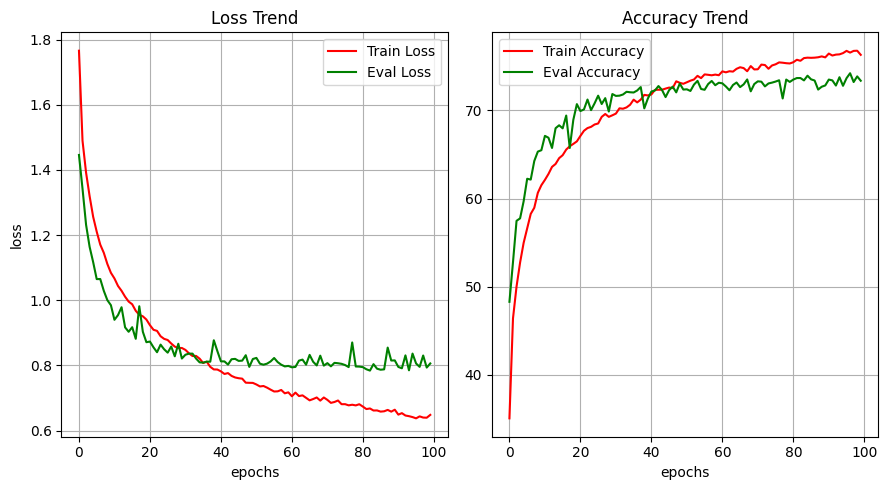

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

####################################################
plt.subplot(1, 2, 1)                # nrows=1, ncols=2, index=1
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(train_loss_list, color='red', label='Train Loss')
plt.plot(eval_loss_list, color='green', label='Eval Loss')
plt.legend(loc='best')

####################################################
plt.subplot(1, 2, 2)                # nrows=1, ncols=2, index=2
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.grid()
plt.plot(train_accuracy_list, color='red', label='Train Accuracy')
plt.plot(eval_accuracy_list, color='green', label='Eval Accuracy')
plt.legend(loc='best')


plt.tight_layout()
plt.show()

# 평가

In [ ]:
# model_evaluate() 와 동일한 code
def model_test(dataloader, model, loss_function, optimizer):

  # model을 평가(추론) mode로 ..
  # model의 parameter를 update 하지 않는 mode
  model.eval()

  # gradient를 계산하는 autograd engine을 비활성화한다.
  # 역전파(Backpropagation)에 필요한 메모리 등을 절약할 수 있어 계산 시 연산 속도가 빨라진다
  with torch.no_grad():
    # 검증 함수에는 역전파(Backpropagation) code가 없다.
    # 이 함수의 목적은 parameter를 학습을 하는 것이 아니라
    # 현재 model의 오차와 정확도를 알아내는 것이다.

    test_loss_sum = test_correct = test_total = 0

    total_test_batch = len(dataloader)

    for images, labels in dataloader:
      # images.shape = (batch_size, 1, 28, 28)
      x_test = images.to(device)
      y_test = labels.to(device)

      outputs = model(x_test)
      loss = criterion(outputs, y_test)

      test_loss_sum += loss.item()

      test_total += y_test.size(0)
      test_correct += (torch.argmax(outputs, 1) == y_test).sum().item()

    test_avg_loss = test_loss_sum / total_test_batch
    test_avg_accuracy = 100 * test_correct / test_total

    return (test_avg_loss, test_avg_accuracy)

test_loss, test_accuracy = model_test(
                  test_dataset_loader,
                  model,
                  criterion,
                  optimizer)
print(f'test_loss={test_loss}, test_accuracy={test_accuracy}')
# test_loss=0.7968654507284711, test_accuracy=73.79

test_loss=0.7968654507284711, test_accuracy=73.79
